In [127]:
import pandas as pd
import numpy as np
import sqlalchemy as sa
from urllib.parse import quote
import datetime
import seaborn as sns
from datetime import datetime, timedelta
import datetime
import matplotlib.pyplot as plt

import statsmodels.api as sm
from pylab import rcParams

import warnings; 
warnings.filterwarnings("ignore")

In [44]:
cur_time = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print("current times:", cur_time)

current times: 2024-07-16 19:04:51


In [45]:
df = pd.read_csv("data/dataset.csv", encoding="cp874", )

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5221 entries, 0 to 5220
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   E0          5220 non-null   float64
 1   E1          5221 non-null   int64  
 2   PE0         3407 non-null   float64
 3   PE1         3407 non-null   float64
 4   DISEASE     5221 non-null   int64  
 5   HN          3394 non-null   object 
 6   NMEPAT      341 non-null    object 
 7   SEX         5221 non-null   int64  
 8   AGEY        5221 non-null   int64  
 9   AGEM        5221 non-null   int64  
 10  AGED        5221 non-null   int64  
 11  MARIETAL    3407 non-null   float64
 12  RACE        5221 non-null   object 
 13  RACE1       10 non-null     float64
 14  OCCUPAT     5221 non-null   int64  
 15  ADDRCODE    5221 non-null   object 
 16  METROPOL    3407 non-null   float64
 17  HOSPITAL    3407 non-null   float64
 18  TYPE        5221 non-null   int64  
 19  RESULT      5221 non-null  

Func show label

In [47]:
def annotate_vertical_plot(ax):
  for p in ax.patches:
    value = p.get_height()
    position = (p.get_x() + p.get_width() / 2, p.get_height())
    ax.annotate(f"{value: .0f}", position, ha ="center", va="bottom")

ref data dic : https://apps-doe.moph.go.th/boe/software/file/R506_v_4_10.pdf

ประเภทเชื้อ

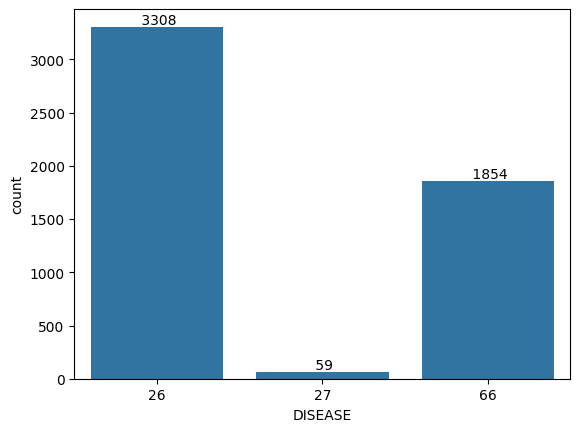

In [48]:
ax = sns.countplot(data=df, x="DISEASE", )
annotate_vertical_plot(ax)

เพศ 1 ชาย 2 หญิง

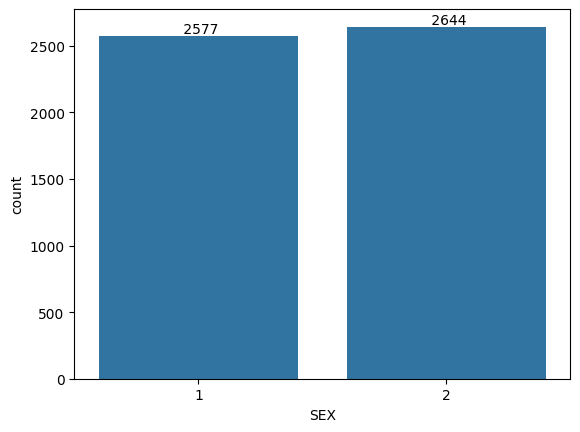

In [49]:
ax = sns.countplot(data=df , x="SEX")
annotate_vertical_plot(ax)

สถานะ  1 โสด 2 คู่ 3 หย่าร้าง 4 หม้าย 5 ไม่ทราบ

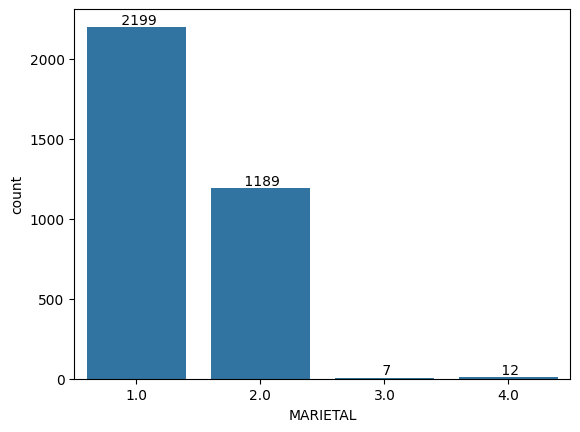

In [50]:
ax = sns.countplot(data=df , x="MARIETAL")
annotate_vertical_plot(ax)

สัญชาติ 1 ไทย 2 จีน/ฮ่องกง/ไต้หวัน 3 พม่า 4 มาเลเซีย 5 กัมพูชา 6 ลาว 7 เวียดนาม 8 อื่น

In [ ]:
# def change_race(txt) :
#    race_dict = {
#         "ไทย": 1,
#         "จีน": 2,
#         "ฮ๋องกง": 2,
#         "ไต้หวัน": 2,
#         "พม่า": 3,
#         "มาเลเซีย": 4,
#         "กัมพูชา": 5,
#         "ลาว": 6,
#         "เวียดนาม": 7,
#         "อื่นๆ": 8
#     }
#    if txt in race_dict:
#       return race_dict[txt]
#    else:
#       return "ไม่พบข้อมูล"

In [ ]:
##print(change_race("ไทย"))

In [51]:
df.loc[df['RACE'] == 'ไทย', 'RACE'] = '1'
df.loc[df['RACE'] == 'จีน', 'RACE'] = '2'
df.loc[df['RACE'] == 'ฮ๋องกง', 'RACE'] = '2'
df.loc[df['RACE'] == 'ไต้หวัน', 'RACE'] = '2'
df.loc[df['RACE'] == 'พม่า', 'RACE'] = '3'
df.loc[df['RACE'] == 'มาเลเซีย', 'RACE'] = '4'
df.loc[df['RACE'] == 'กัมพูชา', 'RACE'] = '5'
df.loc[df['RACE'] == 'ลาว', 'RACE'] = '6'
df.loc[df['RACE'] == 'เวียดนาม', 'RACE'] = '7'
df.loc[df['RACE'] == 'อื่นๆ', 'RACE'] = '8'


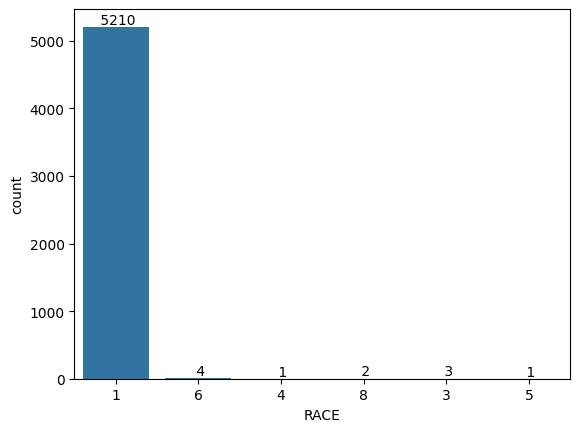

In [52]:
ax = sns.countplot(data=df , x="RACE")
annotate_vertical_plot(ax)

In [ ]:
# ax = sns.countplot(data=df , x="DATESICK")
# annotate_vertical_plot(ax)

ผู้ป่วยรายอำเภอ

In [53]:
df['NADDRCODE'] = df.ADDRCODE.apply(lambda x: x[:4])
df['NADDRCODE']

0       9602
1       9601
2       9602
3       9601
4       9601
        ... 
5216    9601
5217    9601
5218    9606
5219    9601
5220    9603
Name: NADDRCODE, Length: 5221, dtype: object

In [ ]:
# Strip any leading/trailing whitespace from the date strings
df['DATESICK'] = df['DATESICK'].str.strip()

# Convert 'DATESICK' column to datetime
df['DATESICK'] = pd.to_datetime(df['DATESICK'], format='%d/%m/%Y')

In [61]:
# Convert 'DATESICK' column to datetime
df['DATESICK'].head()

0   2019-01-02
1   2019-01-02
2   2019-01-02
3   2019-01-02
4   2019-01-03
Name: DATESICK, dtype: datetime64[ns]

In [ ]:
df['YEARSICK'] = df['DATESICK'].dt.year
df['YEARSICK']

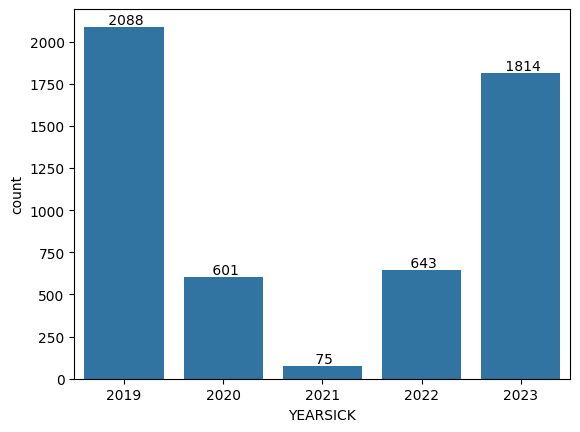

In [63]:
ax = sns.countplot(data=df , x="YEARSICK")
annotate_vertical_plot(ax)

In [11]:
patient_grouped = df.groupby([ 'NADDRCODE']).size().reset_index()
print(patient_grouped)

   NADDRCODE     0
0       6503     1
1       9601  1229
2       9602   178
3       9603   376
4       9604   540
5       9605   742
6       9606   392
7       9607   135
8       9608   196
9       9609    70
10      9610   259
11      9611   362
12      9612   217
13      9613   524


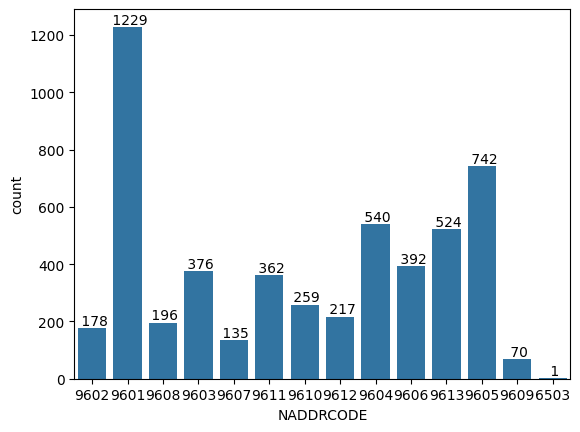

In [12]:
ax = sns.countplot(data=df , x="NADDRCODE")
annotate_vertical_plot(ax)

In [13]:
new_df = df[~df["NADDRCODE"].str.contains('96')]
new_df

,E0,E1,PE0,PE1,DISEASE,HN,NMEPAT,SEX,AGEY,AGEM,...,DATEDEFINE,DATEDEATH,DATERECORD,DATEREACH,INTIME,ORGANISM,COMPLICA,ICD10,OFFICEID,NADDRCODE
2969,16834.0,192,3854.0,22.0,66,000165930,NaN,1,41,3,...,13/10/2022,NaN,14/10/2022,15/10/2022,True,NaN,NaN,A90,96010000,6503


เอาเฉพาะผู้ป่วยที่อยุ่นราธิวาส

In [65]:
df = df[df["NADDRCODE"].str.contains('96')]
df

,E0,E1,PE0,PE1,DISEASE,HN,NMEPAT,SEX,AGEY,AGEM,...,DATEDEATH,DATERECORD,DATEREACH,INTIME,ORGANISM,COMPLICA,ICD10,OFFICEID,NADDRCODE,YEARSICK
0,942.0,4,191.0,3.0,26,000491517,NaN,1,31,3,...,NaN,10/1/2019,11/1/2019,False,NaN,NaN,ไม่ระบุ,96010000,9602,2019
1,952.0,14,197.0,5.0,26,00056933,NaN,1,62,1,...,NaN,9/1/2019,11/1/2019,False,NaN,NaN,ไม่ระบุ,96010000,9601,2019
2,964.0,26,29.0,1.0,26,1791,NaN,2,39,6,...,NaN,6/1/2019,7/1/2019,False,NaN,NaN,ไม่ระบุ,96010000,9602,2019
3,966.0,28,196.0,4.0,26,000233446,NaN,2,32,4,...,NaN,9/1/2019,11/1/2019,False,NaN,NaN,ไม่ระบุ,96010000,9601,2019
4,954.0,16,96.0,2.0,26,000231638,NaN,1,15,0,...,NaN,8/1/2019,8/1/2019,False,NaN,NaN,ไม่ระบุ,96010000,9601,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216,22471.0,1218,NaN,NaN,26,NaN,NaN,2,2,9,...,NaN,12/1/2024,12/1/2024,NaN,NaN,NaN,NaN,96010120,9601,2023
5217,22472.0,1219,NaN,NaN,26,NaN,NaN,2,43,2,...,NaN,12/1/2024,12/1/2024,NaN,NaN,NaN,NaN,96010120,9601,2023
5218,22473.0,1220,NaN,NaN,26,NaN,NaN,1,51,0,...,NaN,12/1/2024,12/1/2024,NaN,NaN,NaN,NaN,96010120,9606,2023
5219,22474.0,1221,NaN,NaN,26,NaN,NaN,1,14,5,...,NaN,12/1/2024,12/1/2024,NaN,NaN,NaN,NaN,96010120,9601,2023


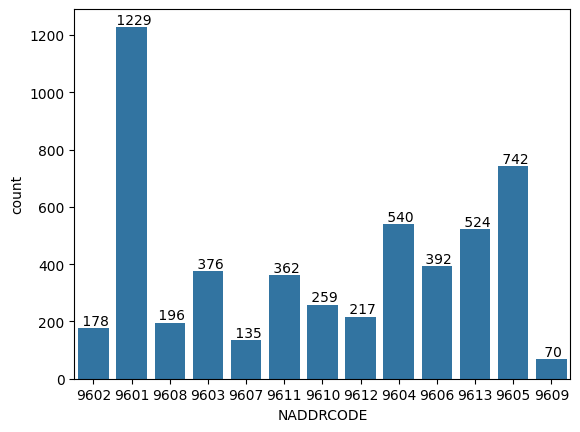

In [66]:
ax = sns.countplot(data=df , x="NADDRCODE")
annotate_vertical_plot(ax)

In [67]:
# from datetime import datetime
def calculate_week_number(str_date):
    # Start of the custom week 1
    # str_date = datetime.strptime(str_date, format).date()
    start_of_week_1 = pd.Timestamp(year=str_date.year, month=1, day=7)
    # print(start_of_week_1)
    # if str_date < start_of_week_1:
    #     start_date = datetime.date(str_date.year, 1, 7)
    if str_date < start_of_week_1:
        return 52  # For dates before the start of week 1
    return ((str_date - start_of_week_1).days // 7) + 1

In [ ]:
# Sample data with date as string
# data = {
#     'date': ['02/01/2024', '07/01/2024', '06/07/2024'],
#     'cases': [5, 10, 3]
# }
# da = pd.DataFrame(data)

# da['ndate'] = da['date'].str.strip()

# # Convert 'DATESICK' column to datetime
# da['ndate'] = pd.to_datetime(da['ndate'], format='%d/%m/%Y')
# da.info()
# da['week_number'] = da['ndate'].apply(calculate_week_number)
# print(da)

In [ ]:
# Apply the function to get the week number
#df['week_number'] = df['DATESICK'].apply(calculate_week_number)

# Group by week number and sum cases
# weekly_cases = da.groupby('week_number')['ndate'].count().reset_index()

# print(weekly_cases)

หาผู้ป่วย รายอำเภอ

In [68]:
# Apply the function to get the week number
df['week_number'] = df['DATESICK'].apply(calculate_week_number)

# Group by week number and sum cases
#weekly_cases = df.groupby('week_number','NADDRCODE')['DATESICK'].count().reset_index()
case_on_week_by_district = df.groupby(['week_number', 'NADDRCODE']).size().reset_index(name='DATESICK')
print(case_on_week_by_district)

     week_number NADDRCODE  DATESICK
0              1      9601        18
1              1      9602         4
2              1      9603         6
3              1      9604         8
4              1      9605        12
..           ...       ...       ...
623           52      9608         2
624           52      9610         4
625           52      9611        12
626           52      9612         3
627           52      9613         6

[628 rows x 3 columns]


In [69]:
def find_week_number(date):
    """
    Calculate the week number of a given date, where week 1 starts on January 7.

    Args:
    date (datetime.date): The date to calculate the week number for.

    Returns:
    int: The week number of the date.
    """
    # Define the starting date of week 1
    start_date = datetime.date(date.year, 1, 7)
    
    # If the given date is before January 7 of the same year, adjust the start date to the previous year's January 7
    if date < start_date:
        start_date = datetime.date(date.year - 1, 1, 7)
    
    # Calculate the difference in days
    days_diff = (date - start_date).days
    
    # Calculate the week number
    week_number = (days_diff // 7) + 1
    
    return week_number

def get_start_of_week(week_number, year):
    """
    Calculate the start date of a given week number, where week 1 starts on January 7.

    Args:
    week_number (int): The week number.
    year (int): The year.

    Returns:
    datetime.date: The start date of the week.
    """
    start_date = datetime.date(year, 1, 7)
    start_of_week = start_date + datetime.timedelta(weeks=week_number - 1)
    return start_of_week

def create_weeks_dataframe(start_date_str, end_date_str):
    """
    Create a DataFrame with weeks starting from January 7, along with their start and end dates.

    Args:
    start_date_str (str): The start date string for the DataFrame in 'YYYY-MM-DD' format.
    end_date_str (str): The end date string for the DataFrame in 'YYYY-MM-DD' format.

    Returns:
    pd.DataFrame: A DataFrame with week numbers and their start and end dates.
    """
    start_date = datetime.datetime.strptime(start_date_str, '%Y-%m-%d').date()
    end_date = datetime.datetime.strptime(end_date_str, '%Y-%m-%d').date()
    
    weeks = []
    current_date = start_date
    
    while current_date <= end_date:
        week_number = find_week_number(current_date)
        start_of_week = get_start_of_week(week_number, current_date.year)
        end_of_week = start_of_week + datetime.timedelta(days=6)
        weeks.append({
            'week_number': week_number,
            'start_date': start_of_week,
            'end_date': end_of_week
        })
        current_date = end_of_week + datetime.timedelta(days=1)
    
    weeks_df = pd.DataFrame(weeks).drop_duplicates(subset=['week_number'])
    return weeks_df

In [ ]:
# Example usage:
start_date = '2024-01-07'
end_date = '2025-01-04'
weeks_df = create_weeks_dataframe(start_date, end_date)
weeks_df

In [71]:
ndf = case_on_week_by_district.merge(weeks_df, on='week_number', how='left')
ndf

,week_number,NADDRCODE,DATESICK,start_date,end_date
0,1,9601,18,2024-01-07,2024-01-13
1,1,9602,4,2024-01-07,2024-01-13
2,1,9603,6,2024-01-07,2024-01-13
3,1,9604,8,2024-01-07,2024-01-13
4,1,9605,12,2024-01-07,2024-01-13
...,...,...,...,...,...
623,52,9608,2,2024-12-29,2025-01-04
624,52,9610,4,2024-12-29,2025-01-04
625,52,9611,12,2024-12-29,2025-01-04
626,52,9612,3,2024-12-29,2025-01-04


In [72]:
new_df = pd.merge(case_on_week_by_district, weeks_df , on=['week_number'])
new_df = new_df[['week_number','NADDRCODE', 'start_date', 'end_date', 'DATESICK']]
new_df

,week_number,NADDRCODE,start_date,end_date,DATESICK
0,1,9601,2024-01-07,2024-01-13,18
1,1,9602,2024-01-07,2024-01-13,4
2,1,9603,2024-01-07,2024-01-13,6
3,1,9604,2024-01-07,2024-01-13,8
4,1,9605,2024-01-07,2024-01-13,12
...,...,...,...,...,...
623,52,9608,2024-12-29,2025-01-04,2
624,52,9610,2024-12-29,2025-01-04,4
625,52,9611,2024-12-29,2025-01-04,12
626,52,9612,2024-12-29,2025-01-04,3


In [73]:
new_df.rename(columns={'DATESICK': "total_case", 'NADDRCODE' : "district_code"}, inplace=True)
new_df

,week_number,district_code,start_date,end_date,total_case
0,1,9601,2024-01-07,2024-01-13,18
1,1,9602,2024-01-07,2024-01-13,4
2,1,9603,2024-01-07,2024-01-13,6
3,1,9604,2024-01-07,2024-01-13,8
4,1,9605,2024-01-07,2024-01-13,12
...,...,...,...,...,...
623,52,9608,2024-12-29,2025-01-04,2
624,52,9610,2024-12-29,2025-01-04,4
625,52,9611,2024-12-29,2025-01-04,12
626,52,9612,2024-12-29,2025-01-04,3


In [ ]:
ax2 = sns.lineplot(data=new_df, x='week_number', y='total_case')
ax2.set_xticks(ax2.get_xticks()[0::4])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='week_number', ylabel='total_case'>

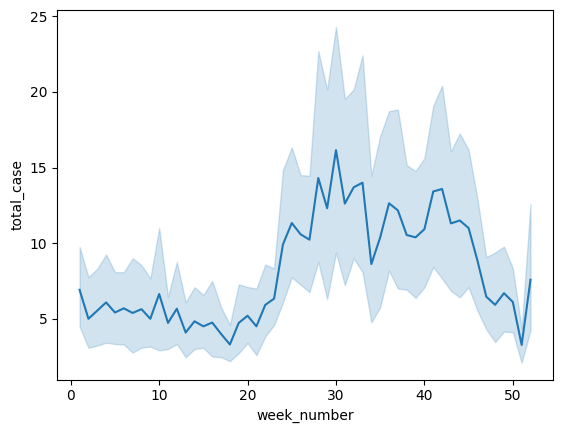

In [74]:
sns.lineplot(data=new_df, x='week_number',y='total_case')

In [97]:
new_df.head()

,week_number,district_code,start_date,end_date,total_case
0,1,9601,2024-01-07,2024-01-13,18
1,1,9602,2024-01-07,2024-01-13,4
2,1,9603,2024-01-07,2024-01-13,6
3,1,9604,2024-01-07,2024-01-13,8
4,1,9605,2024-01-07,2024-01-13,12


In [ ]:
new_df.info()

Export to csv

In [82]:
new_df.to_csv(r"data\new_dataset.csv", index=False)

In [105]:
df.head()

,E0,E1,PE0,PE1,DISEASE,HN,NMEPAT,SEX,AGEY,AGEM,...,DATERECORD,DATEREACH,INTIME,ORGANISM,COMPLICA,ICD10,OFFICEID,NADDRCODE,YEARSICK,week_number
0,942.0,4,191.0,3.0,26,000491517,NaN,1,31,3,...,10/1/2019,11/1/2019,False,NaN,NaN,ไม่ระบุ,96010000,9602,2019,52
1,952.0,14,197.0,5.0,26,00056933,NaN,1,62,1,...,9/1/2019,11/1/2019,False,NaN,NaN,ไม่ระบุ,96010000,9601,2019,52
2,964.0,26,29.0,1.0,26,1791,NaN,2,39,6,...,6/1/2019,7/1/2019,False,NaN,NaN,ไม่ระบุ,96010000,9602,2019,52
3,966.0,28,196.0,4.0,26,000233446,NaN,2,32,4,...,9/1/2019,11/1/2019,False,NaN,NaN,ไม่ระบุ,96010000,9601,2019,52
4,954.0,16,96.0,2.0,26,000231638,NaN,1,15,0,...,8/1/2019,8/1/2019,False,NaN,NaN,ไม่ระบุ,96010000,9601,2019,52


In [106]:
# Group by week number and sum cases
#weekly_cases = df.groupby('week_number','NADDRCODE')['DATESICK'].count().reset_index()
case_on_week_in_year = df.groupby(['week_number','YEARSICK']).size().reset_index(name='DATESICK')
print(case_on_week_in_year)

     week_number  YEARSICK  DATESICK
0              1      2019        30
1              1      2020        29
2              1      2021         1
3              1      2023        23
4              2      2019        18
..           ...       ...       ...
227           52      2019        23
228           52      2020        36
229           52      2021         6
230           52      2022         4
231           52      2023        22

[232 rows x 3 columns]


In [108]:
weeks_df.head()

,week_number,start_date,end_date
0,1,2024-01-07,2024-01-13
1,2,2024-01-14,2024-01-20
2,3,2024-01-21,2024-01-27
3,4,2024-01-28,2024-02-03
4,5,2024-02-04,2024-02-10


In [116]:
new_df2 = pd.merge(case_on_week_in_year, weeks_df , on=['week_number'])
new_df2 = new_df2[['week_number','YEARSICK', 'start_date', 'end_date', 'DATESICK']]
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   week_number  232 non-null    int64 
 1   YEARSICK     232 non-null    int32 
 2   start_date   232 non-null    object
 3   end_date     232 non-null    object
 4   DATESICK     232 non-null    int64 
dtypes: int32(1), int64(2), object(2)
memory usage: 8.3+ KB


In [120]:
# Strip any leading/trailing whitespace from the date strings
# new_df2['start_date'] = new_df2['start_date'].str.strip()

# Convert 'DATESICK' column to datetime
new_df2['start_date'] = pd.to_datetime(new_df2['start_date'], format='%d/%m/%Y')

In [ ]:
new_df2['MONTHSICK'] = new_df2['start_date'].dt.month
new_df2['DAYSICK'] = new_df2['start_date'].dt.day

In [132]:
new_df2.head()

,week_number,YEARSICK,start_date,end_date,DATESICK,MONTHSICK,DAYSICK
0,1,2019,2024-01-07,2024-01-13,30,1,7
1,1,2020,2024-01-07,2024-01-13,29,1,7
2,1,2021,2024-01-07,2024-01-13,1,1,7
3,1,2023,2024-01-07,2024-01-13,23,1,7
4,2,2019,2024-01-14,2024-01-20,18,1,14


In [ ]:
ax = sns.countplot(data=new_df2 , x="DAYSICK")
annotate_vertical_plot(ax)

In [160]:
# new_df2['DATE'] = pd.to_datetime(new_df2[['YEARSICK','MONTHSICK','DAYSICK']])
new_df2['date'] = pd.to_datetime(new_df2.YEARSICK.astype(str) + '/' + new_df2.MONTHSICK.astype(str) +'/' + new_df2.DAYSICK.astype(str))

In [161]:
new_df2.head()

,week_number,YEARSICK,start_date,end_date,DATESICK,MONTHSICK,DAYSICK,date
0,1,2019,2024-01-07,2024-01-13,30,1,7,2019-01-07
1,1,2020,2024-01-07,2024-01-13,29,1,7,2020-01-07
2,1,2021,2024-01-07,2024-01-13,1,1,7,2021-01-07
3,1,2023,2024-01-07,2024-01-13,23,1,7,2023-01-07
4,2,2019,2024-01-14,2024-01-20,18,1,14,2019-01-14


In [177]:
df2 = new_df2[['date','DATESICK']].sort_values('date')

In [178]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, 0 to 231
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      232 non-null    datetime64[ns]
 1   DATESICK  232 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.4 KB


In [179]:
df2.rename(columns={'date': "date_sick", 'DATESICK' : "total_case"}, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, 0 to 231
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_sick   232 non-null    datetime64[ns]
 1   total_case  232 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.4 KB


In [180]:
df2.to_csv(r"data\df2.csv", index=False)

## Data Transformation

In [181]:
res_df = pd.read_csv('data\df2.csv', header=0, index_col=0, parse_dates=True)
res_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 232 entries, 2019-01-07 to 2023-12-29
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   total_case  232 non-null    int64
dtypes: int64(1)
memory usage: 3.6 KB


In [182]:
res_df = res_df['total_case']
print(res_df.head())
print(res_df.size)

date_sick
2019-01-07    30
2019-01-14    18
2019-01-21    18
2019-01-28    23
2019-02-04    28
Name: total_case, dtype: int64
232


count    232.000000
mean      22.500000
std       20.103843
min        1.000000
25%        4.000000
50%       19.000000
75%       32.000000
max      104.000000
Name: total_case, dtype: float64


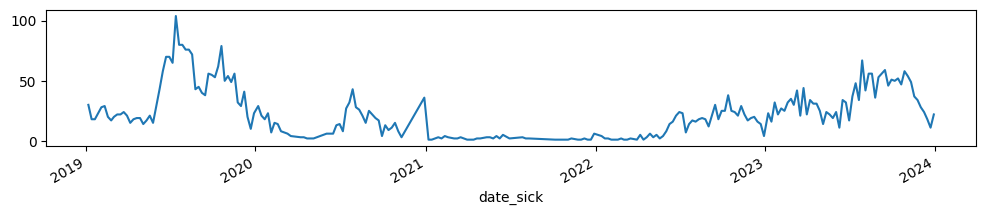

In [183]:
# Show some descriptive statistics and do timeseries plot
print(res_df.describe())
res_df.plot(figsize=(12,2));

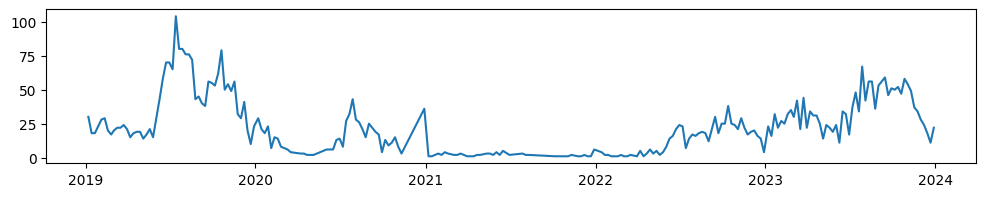

In [200]:
plt.figure(figsize=(12,2))
plt.plot(res_df)
plt.show()

In [ ]:


plt.rcParams['figure.figsize'] = (10,6)
decomp = sm.tsa.seasonal_decompose(res_df, model='additive')
decomp.plot();

<Axes: xlabel='date_sick'>

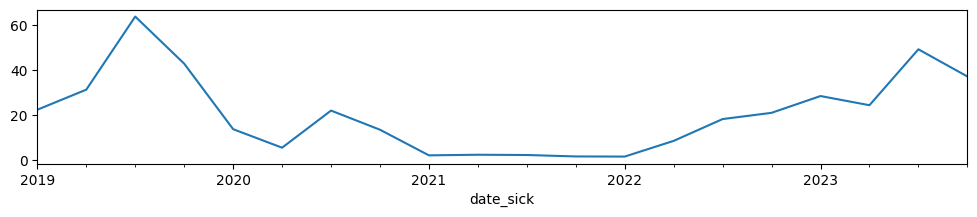

In [207]:
# Monthly aggregate mean
res_df_agg = res_df.resample('Q').mean()
res_df_agg.plot(figsize=(12,2))

## Outlier detection

In [222]:
y_outlier = pd.read_csv('data\df2.csv', header=0, index_col=0, parse_dates=True)
y_outlier_ts = y_outlier['total_case']

In [223]:
# Data Transformation
y_outlier_ts_transformed = np.log(y_outlier_ts).diff().diff(4).dropna()

### Check outlier after transform data

Number of outliers:  2
Indices of outliers:  [np.int64(90), np.int64(94)]


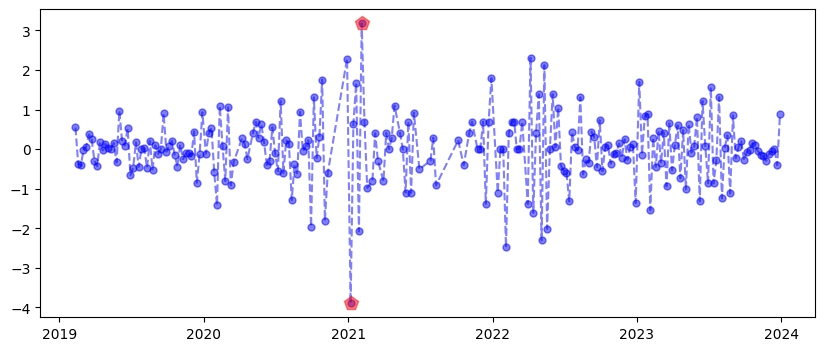

In [224]:
from PyAstronomy import pyasl

n = len(y_outlier_ts_transformed)

max_outliers, alpha = 2, 0.05
num_outlier, indices = pyasl.generalizedESD(y_outlier_ts_transformed, max_outliers, alpha)

print("Number of outliers: ", num_outlier)
print("Indices of outliers: ", indices)
# print("        R      Lambda")
# for i in range(len(r[2])):
#   print("%2d  %8.5f  %8.5f" % ((i+1), r[2][i], r[3][i]))

# Plot the "data"
plt.figure(figsize=(10,4))
plt.plot(y_outlier_ts_transformed, 'b.', ms=10, alpha=0.5, linestyle='--')
plt.plot(y_outlier_ts_transformed[indices], 'rp', ms=10, alpha=0.5)

### Check outlier in original series

Number of outliers:  1
Indices of outliers:  [np.int64(27)]


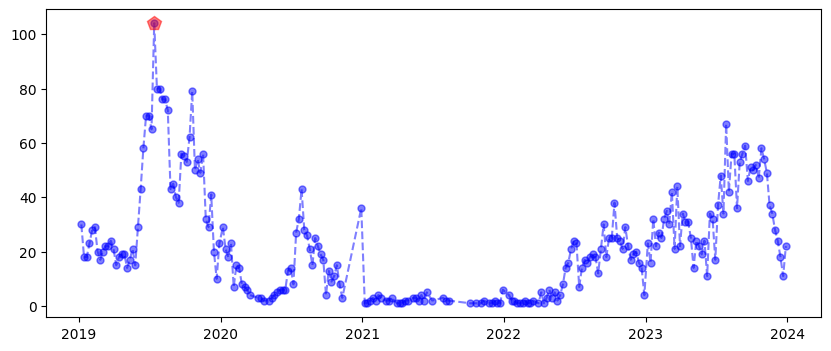

In [225]:
n = len(y_outlier_ts)

max_perc_outliers, alpha = 0.1, 0.05
num_outlier, indices = pyasl.generalizedESD(y_outlier_ts, int(max_perc_outliers*n), alpha)

print("Number of outliers: ", num_outlier)
print("Indices of outliers: ", indices)
# print("        R      Lambda")
# for i in range(len(r[2])):
#   print("%2d  %8.5f  %8.5f" % ((i+1), r[2][i], r[3][i]))

# Plot the "data"
plt.figure(figsize=(10,4))
plt.plot(y_outlier_ts, 'b.', ms=10, alpha=0.5, linestyle='--')
plt.plot(y_outlier_ts[indices], 'rp', ms=10, alpha=0.5)

### Drop outlier data

In [226]:
y_outlier_ts = y_outlier_ts.drop(y_outlier_ts[indices].index)

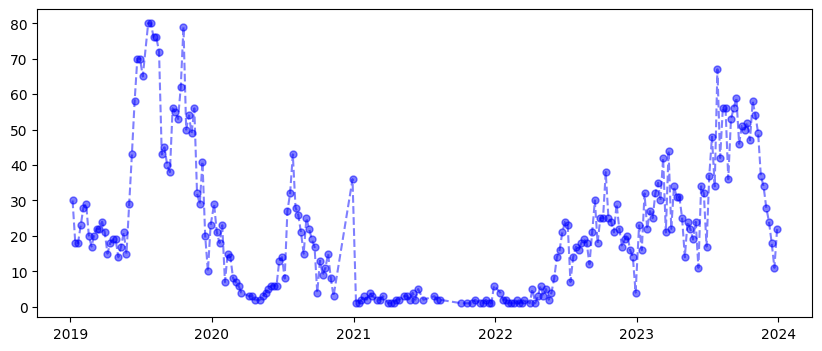

In [227]:
# Plot the "data"
plt.figure(figsize=(10,4))
plt.plot(y_outlier_ts, 'b.', ms=10, alpha=0.5, linestyle='--')

### Re-interpolate outlier data

In [228]:
y_outlier_ts = y_outlier_ts.resample('Q').asfreq()
y_filled = y_outlier_ts.interpolate(method='linear')

In [229]:
y_filled.to_csv('data\df_preprocess.csv')  

## Data Imputation

In [230]:
# Simulate missing data
res_df_agg_missing = res_df_agg.drop(res_df_agg.sample(frac=0.20).index)
res_df_agg_missing = res_df_agg_missing.resample('Q').asfreq()

### Check if the series has a missing value 

In [231]:
y_nan = res_df_agg_missing
print(y_nan.head())
print('Series has {} missing values'.format(y_nan.isna().sum()))
date_missed = y_nan[y_nan.isna()].index

date_sick
2019-03-31    22.461538
2019-06-30          NaN
2019-09-30    63.846154
2019-12-31    42.923077
2020-03-31    13.818182
Freq: QE-DEC, Name: total_case, dtype: float64
Series has 3 missing values


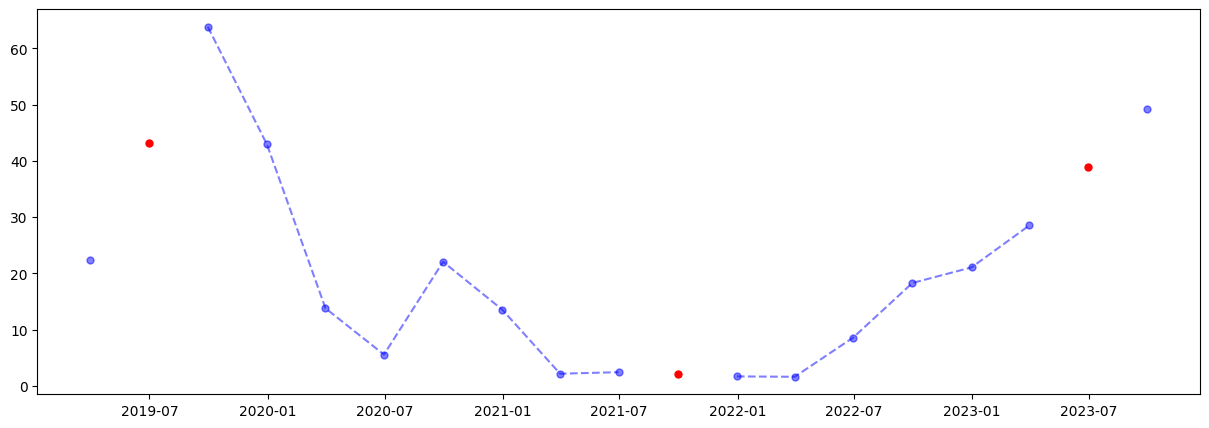

In [232]:
y_filled = y_nan.interpolate(method='linear')

plt.figure(figsize=(15,5))
plt.plot(y_nan, 'bo--', alpha=0.5, ms=5)
plt.plot(y_filled.loc[date_missed],'ro', ms=5)
plt.show()

<Axes: xlabel='date_sick'>

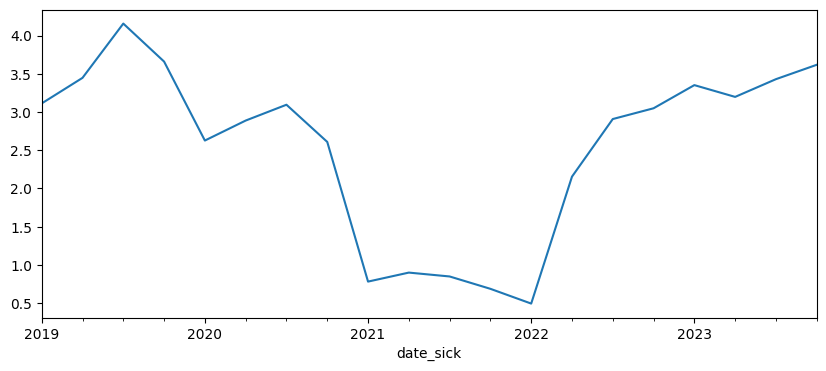

In [211]:
np.log(y_filled).plot(figsize=(10,4))

### Detrending

<Axes: xlabel='date_sick'>

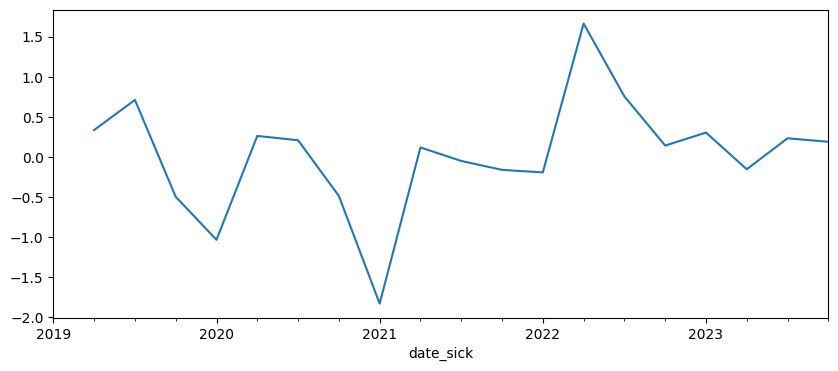

In [212]:
detrend_ts = np.log(y_filled).diff()
detrend_ts.plot(figsize=(10,4))

### Deseasonalizing

<Axes: xlabel='date_sick'>

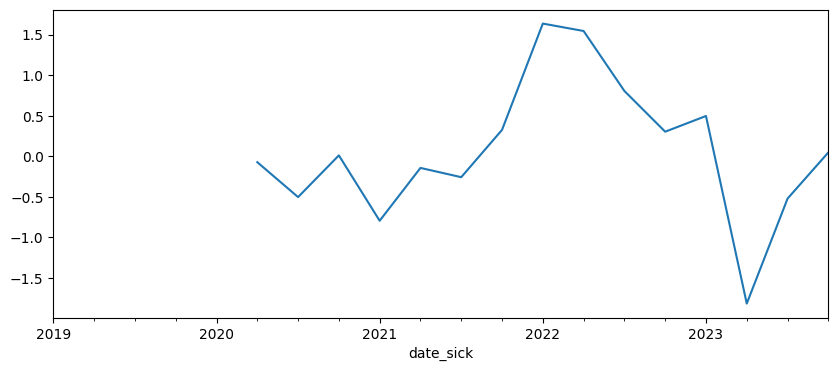

In [213]:
deseason_ts = np.log(y_filled).diff().diff(4)
deseason_ts.plot(figsize=(10,4))

## Autocorrelation in time series

ACF

Figure(1000x600)


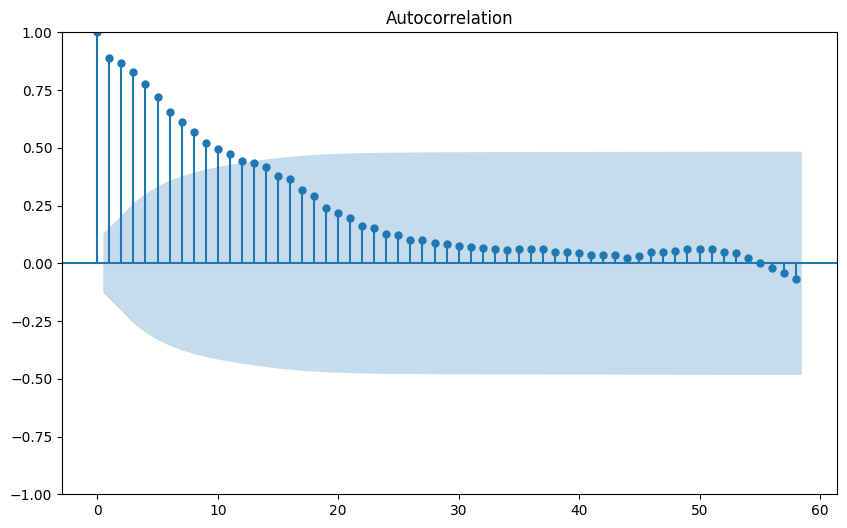

In [233]:
from statsmodels.graphics.tsaplots import plot_acf

print(plot_acf(res_df,lags=len(res_df)/4))

Figure(1000x600)


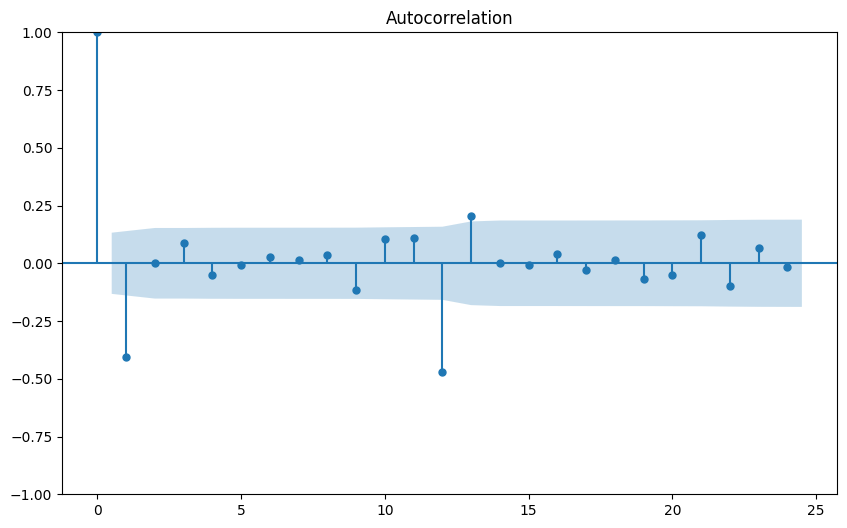

In [234]:
from statsmodels.graphics.tsaplots import plot_acf

print(plot_acf(np.log(res_df).diff().diff(12).dropna()))

### Ljung-Box test for no auto-correlation in first h lags

In [217]:
from statsmodels.stats.diagnostic import acorr_ljungbox

h = min(10, len(np.log(res_df).diff().diff(12).dropna())/5)
lb_result = acorr_ljungbox(np.log(res_df).diff().diff(12).dropna(), lags=h)
lb_result

,lb_stat,lb_pvalue
1,36.775007,1.325790e-09
2,36.775778,1.033335e-08
3,38.433408,2.288098e-08
4,38.993165,6.989131e-08
5,39.004897,2.369453e-07
6,39.189887,6.569587e-07
7,39.231527,1.765413e-06
8,39.554992,3.876811e-06
9,42.590621,2.562401e-06
10,45.190801,2.008953e-06


## INSERT TO DB

Insert data to db 

In [22]:
DIALECT = "mysql"
SQL_DRIVER = "pymysql"
USERNAME = "user"
PASSWORD = "user"
HOST = "localhost"
PORT = 6001
DBNAME = "r506"

conn_str = DIALECT + "+" + SQL_DRIVER + "://" + USERNAME + ":" +quote(PASSWORD) + "@" + HOST + ":" +str(PORT) + "/" + DBNAME

In [ ]:
with sa.create_engine(conn_str).connect() as con:
  new_df.to_sql("cases",con,index=None, if_exists='replace')